In [2]:
test = ["800万", "4人", "40才", "男"]
print(test)

['800万', '4人', '40才', '男']


In [6]:
test = {"annual income": "8 million", "family size": "4", "age": "40 years old", "sex": "male"}
print(test)

{'annual income': '8 million', 'family size': '4', 'age': '40 years old', 'sex': 'male'}


In [8]:
hist_worldcup = {"Brazil":5, "Germany":4, "Italy":4, "Argentina":2, "France":2, "England": 1}

In [12]:
hist_worldcup.keys()

dict_keys(['Brazil', 'Germany', 'Italy', 'Argentina', 'France', 'England'])

In [13]:
hist_worldcup.values()

dict_values([5, 4, 4, 2, 2, 1])

In [14]:
hist_worldcup.items()

dict_items([('Brazil', 5), ('Germany', 4), ('Italy', 4), ('Argentina', 2), ('France', 2), ('England', 1)])

In [15]:
for key, value in hist_worldcup.items():
    print(key, value)

Brazil 5
Germany 4
Italy 4
Argentina 2
France 2
England 1


# Problem 1. choosing a dart mat

In [27]:
import numpy as np

dart=np.random.choice(6)
print(dart)

4


# Problem 2. Throw dart and record

In [31]:
dimension_all=range(10)
x_coordinate=[]
y_coordinate=[]
for _ in range(10):
    x_coordinate.append(np.random.choice(6))
    y_coordinate.append(np.random.choice(6))
print(x_coordinate,y_coordinate)

[5, 4, 4, 1, 5, 1, 5, 0, 0, 0] [3, 5, 4, 2, 0, 0, 3, 1, 3, 0]


In [37]:
mean = [0,0]
cov = [[0.01,0],[0,0.01]]
var_x,var_y = np.random.multivariate_normal(mean,cov)
print(var_x,var_y)

-0.0471761114264838 -0.11810875047061785


# Problem 3. throw a lot of dart

In [44]:
throw_dice_x={0:0}
throw_dice_y={0:0}
for i in range(1000):
    throw_dice_x[i],throw_dice_y[i]=np.random.multivariate_normal(mean,cov)
#print(throw_dice_x, throw_dice_y)

# Problem 4. Drawing the position

In [47]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

mpatches.Circle(throw_dice_x,radius=5)
plt.show()

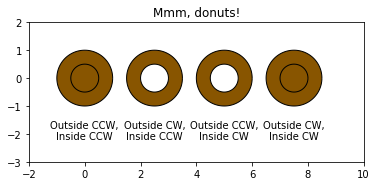

In [48]:
def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    # Shift the path
    vertices[:, 0] += i * 2.5
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='#885500', edgecolor='black')
    ax.add_patch(patch)

    ax.annotate("Outside %s,\nInside %s" % (wise(outside), wise(inside)),
                (i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(-2, 10)
ax.set_ylim(-3, 2)
ax.set_title('Mmm, donuts!')
ax.set_aspect(1.0)
plt.show()
